## Imports

In [1]:
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Input
import vis_helper as v

2022-03-23 07:50:29.427229: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/intel/openvino_2021/data_processing/dl_streamer/lib:/opt/intel/openvino_2021/data_processing/gstreamer/lib:/opt/intel/openvino_2021/opencv/lib:/opt/intel/openvino_2021/deployment_tools/ngraph/lib:/opt/intel/openvino_2021/deployment_tools/inference_engine/external/tbb/lib::/opt/intel/openvino_2021/deployment_tools/inference_engine/external/hddl/lib:/opt/intel/openvino_2021/deployment_tools/inference_engine/external/omp/lib:/opt/intel/openvino_2021/deployment_tools/inference_engine/external/gna/lib:/opt/intel/openvino_2021/deployment_tools/inference_engine/external/mkltiny_lnx/lib:/opt/intel/openvino_2021/deployment_tools/inference_engine/lib/intel64
2022-03-23 07:50:29.427250: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore ab

## Prepare dataset

In [2]:
X = np.arange(1, 46)
X = X.reshape(15, 3, 1)

y = []
for i in X:
    y.append(np.sum(i))

y = np.array(y)

print("X: ", X)
print("y: ", y)

X:  [[[ 1]
  [ 2]
  [ 3]]

 [[ 4]
  [ 5]
  [ 6]]

 [[ 7]
  [ 8]
  [ 9]]

 [[10]
  [11]
  [12]]

 [[13]
  [14]
  [15]]

 [[16]
  [17]
  [18]]

 [[19]
  [20]
  [21]]

 [[22]
  [23]
  [24]]

 [[25]
  [26]
  [27]]

 [[28]
  [29]
  [30]]

 [[31]
  [32]
  [33]]

 [[34]
  [35]
  [36]]

 [[37]
  [38]
  [39]]

 [[40]
  [41]
  [42]]

 [[43]
  [44]
  [45]]]
y:  [  6  15  24  33  42  51  60  69  78  87  96 105 114 123 132]


## Hyperparameters

In [3]:
EPOCHS = 2000
BATCH_SIZE = 32
VALIDATION_SPLIT = 0.2

## Solution via Simple LSTM

In [4]:
model = Sequential()
inputs = Input(shape=(3, 1))
model.add(inputs)
# model.add(LSTM(50, activation='relu', input_shape=(3, 1)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))

2022-03-23 07:50:30.706327: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-03-23 07:50:30.706503: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/intel/openvino_2021/data_processing/dl_streamer/lib:/opt/intel/openvino_2021/data_processing/gstreamer/lib:/opt/intel/openvino_2021/opencv/lib:/opt/intel/openvino_2021/deployment_tools/ngraph/lib:/opt/intel/openvino_2021/deployment_tools/inference_engine/external/tbb/lib::/opt/intel/openvino_2021/deployment_tools/inference_engine/external/hddl/lib:/opt/intel/openvino_2021/deployment_tools/inference_engine/external/omp/lib:/opt/intel/openvino_2021/deployment_tools/inference_engine/external/gna/lib:/opt/intel/openvino_2021/deployment_tools/inference_engine/external/mkltiny_lnx/lib:/opt/intel/openvino_2021/deployment

In [5]:
model.compile(optimizer='adam', loss='mse', metrics='mae')

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                10400     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model.fit(X, y, epochs=EPOCHS, validation_split=VALIDATION_SPLIT, batch_size=BATCH_SIZE, verbose=0)

2022-03-23 07:50:30.817819: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-03-23 07:50:30.842167: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2803200000 Hz


## Training Plot

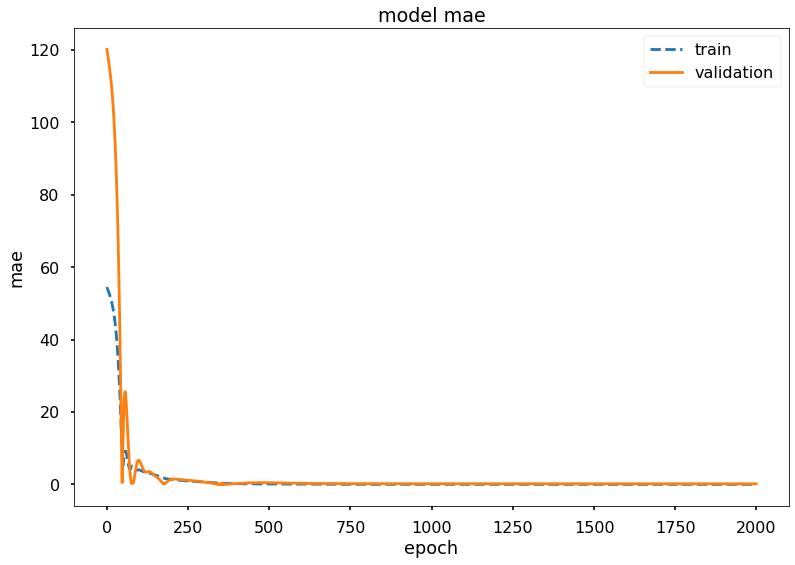

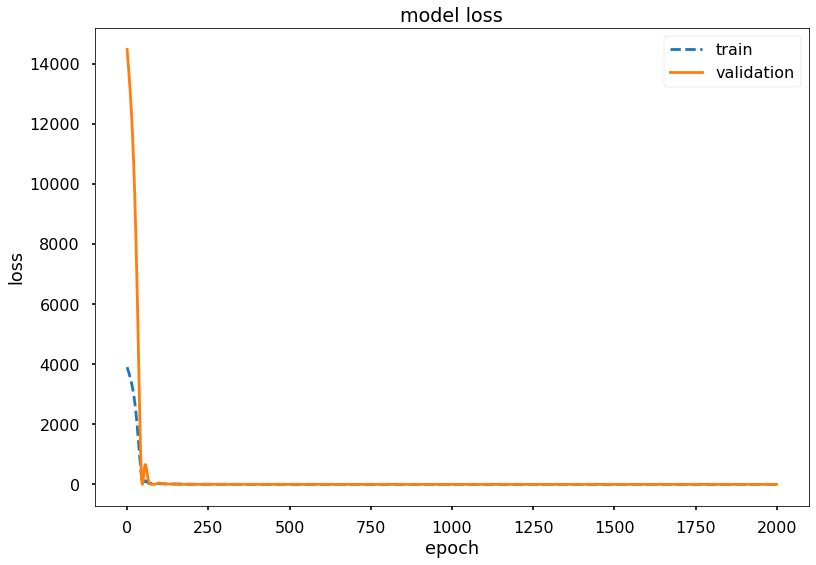

In [8]:
v.plot(history)

## Predictions

In [9]:
test_input = np.array([500, 501, 502])
test_input = test_input.reshape((1, 3, 1))
test_output = model.predict(test_input, verbose=0)

print("Actual: ", np.sum(test_input))
print("Predicted: ", test_output)


Actual:  1503
Predicted:  [[1431.3331]]


___

## Solution via Stacked LSTM

In [10]:
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(3, 1), return_sequences=True))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(LSTM(25, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

In [11]:
model.compile(optimizer='adam', loss='mse', metrics='mae')

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 3, 200)            161600    
_________________________________________________________________
lstm_2 (LSTM)                (None, 3, 100)            120400    
_________________________________________________________________
lstm_3 (LSTM)                (None, 3, 50)             30200     
_________________________________________________________________
lstm_4 (LSTM)                (None, 25)                7600      
_________________________________________________________________
dense_1 (Dense)              (None, 20)                520       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [13]:
history = model.fit(X, y, epochs=EPOCHS, validation_split=VALIDATION_SPLIT, batch_size=BATCH_SIZE, verbose=0)

## Training Plot

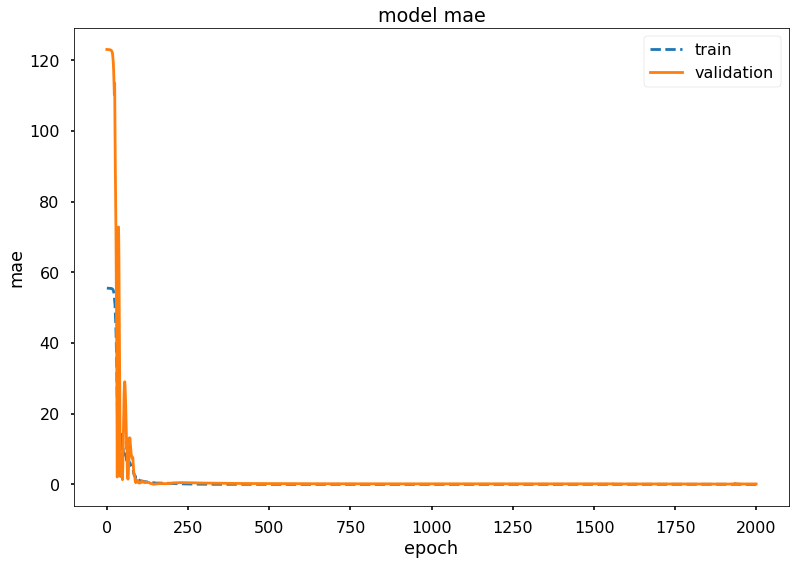

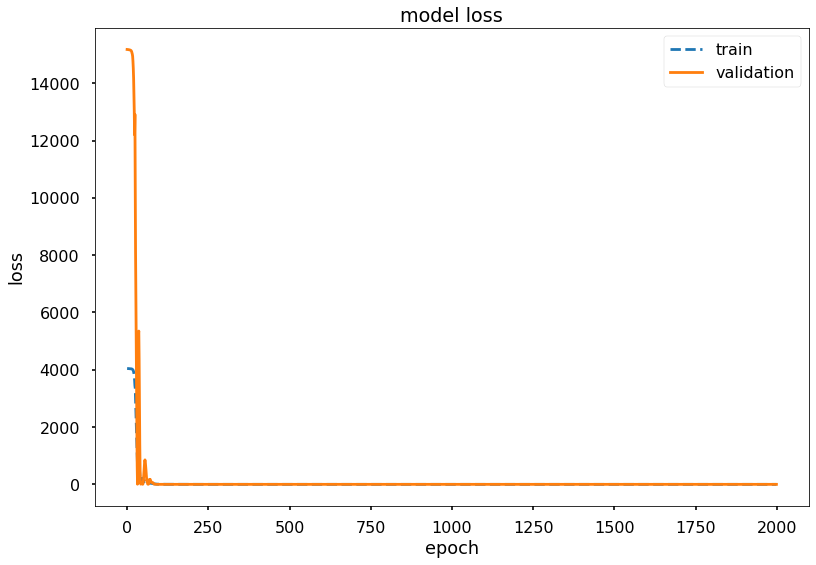

In [14]:
v.plot(history)

## Predictions

In [15]:
test_input = np.array([500, 501, 502])
test_input = test_input.reshape((1, 3, 1))
test_output = model.predict(test_input, verbose=0)

print("Actual: ", np.sum(test_input))
print("Predicted: ", test_output)

Actual:  1503
Predicted:  [[1471.72]]


___

## Solution via Bidirectional LSTM

### Single Bidirectional LSTM

In [16]:
model = Sequential()
model.add(Bidirectional(LSTM(100, activation='relu'), input_shape=(3, 1)))
model.add(Dense(1))

In [17]:
model.compile(optimizer='adam', loss='mse', metrics='mae')

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 200)               81600     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 201       
Total params: 81,801
Trainable params: 81,801
Non-trainable params: 0
_________________________________________________________________


In [19]:
history = model.fit(X, y, epochs=EPOCHS, validation_split=VALIDATION_SPLIT, batch_size=BATCH_SIZE, verbose=0)

## Training Plot

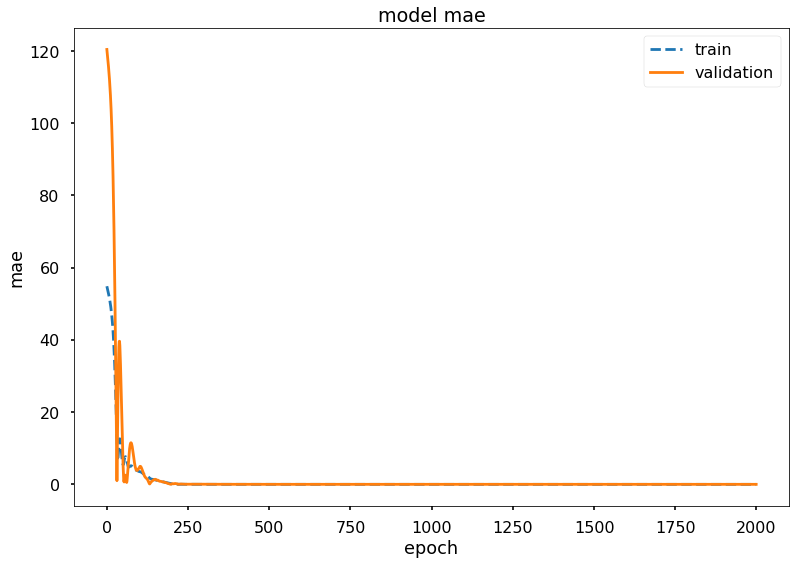

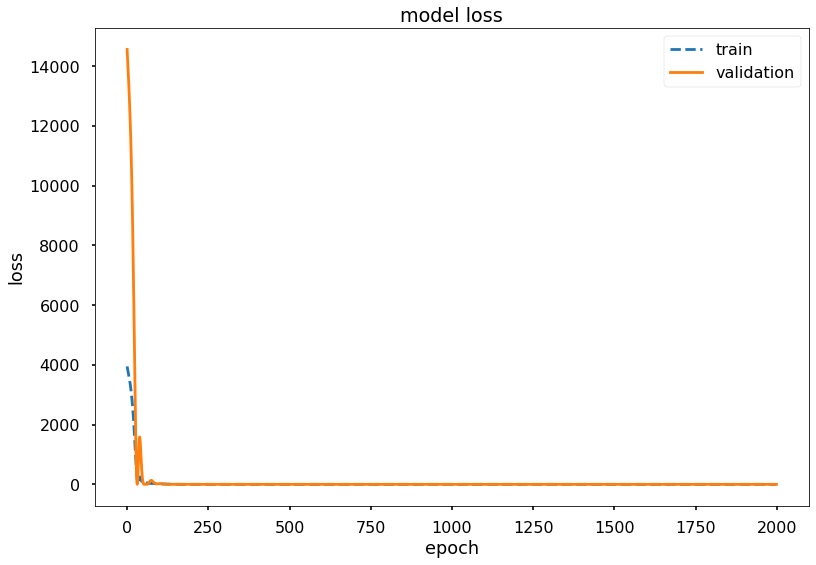

In [20]:
v.plot(history)

## Predictions

In [21]:
test_input = np.array([500, 501, 502])
test_input = test_input.reshape((1, 3, 1))
test_output = model.predict(test_input, verbose=0)

print("Actual: ", np.sum(test_input))
print("Predicted: ", test_output)

Actual:  1503
Predicted:  [[1457.5521]]


### Bidirectional LSTM + Dense

In [22]:
model = Sequential()
model.add(Bidirectional(LSTM(200, activation='relu', return_sequences=False), input_shape=(3, 1)))
# model.add(Bidirectional(LSTM(100, activation='relu'), input_shape=(3, 1)))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))

In [23]:
model.compile(optimizer='adam', loss='mse', metrics='mae')

In [24]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 400)               323200    
_________________________________________________________________
dense_5 (Dense)              (None, 100)               40100     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 363,401
Trainable params: 363,401
Non-trainable params: 0
_________________________________________________________________


In [25]:
history = model.fit(X, y, epochs=EPOCHS, validation_split=VALIDATION_SPLIT, batch_size=BATCH_SIZE, verbose=0)

## Training Plot

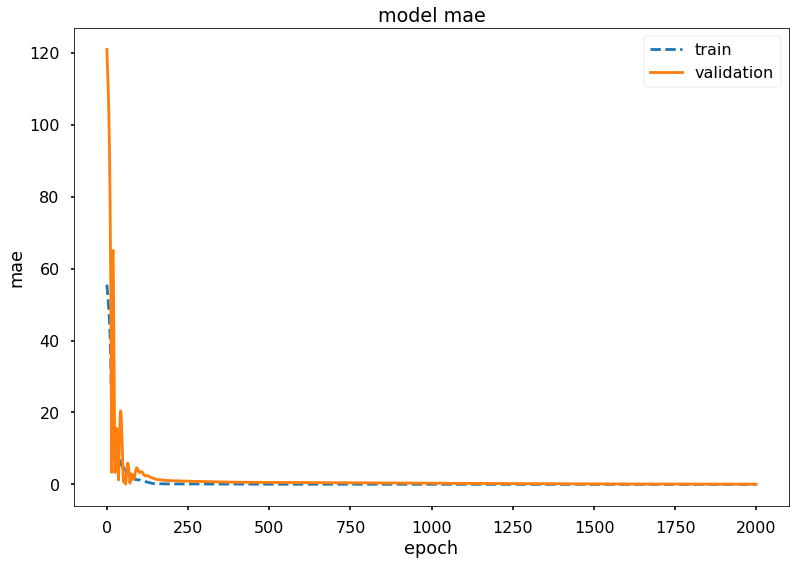

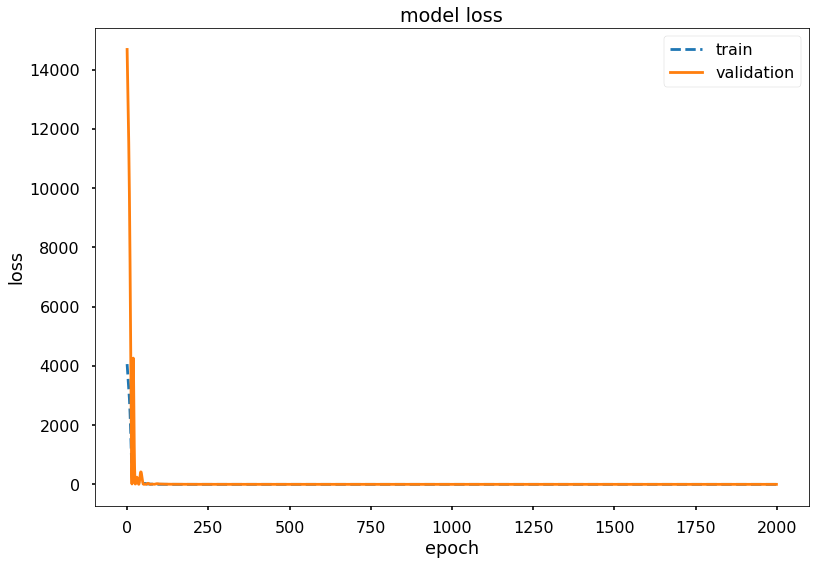

In [26]:
v.plot(history)

## Predictions

In [27]:
test_input = np.array([500, 501, 502])
test_input = test_input.reshape((1, 3, 1))
test_output = model.predict(test_input, verbose=0)

print("Actual: ", np.sum(test_input))
print("Predicted: ", test_output)

Actual:  1503
Predicted:  [[1413.1879]]


___